# Machine, Data and Learning | Assignment 1

### <b>Author :</b> Alapan Sau, Pavani Babburi

## Task 1 : <i>LinearRegression.fit()</i>

The <i>LinearRegression()</i> in <i>sklearn</i> module generates a linear prediction model by selecting a set of coefficients $ w=\left(w_1,\ldots,w_n\right) $ and a bias $ b $ to minimize the residual sum of squares between the actual targets in the training dataset, and the targets predicted by linear approximation of the features. 

<i>LinearRegression()</i> takes a few parameters which help to decide certain features of the linear model. The <i>LinearRegression().fit()</i> is the function which takes the training dataset as an argument and creates the model to fit the training dataset. The coefficients are initialised by the <i>fit()</i> method to the most optimum values by minimising the <i>Mean Squared Error</i> between the training data and the predicted data.

## Task 2 : Calculating Bias and Variance

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from tabulate import tabulate
import pickle

### Task 2.2.1

The training and the test datasets are loaded. The training data is resampled randomly by splitting into 10 smaller datasets of uniform size.

In [2]:
# loading the training set
with open('data/train.pkl', 'rb') as f:
    unpickler = pickle.Unpickler(f)
    file_train = unpickler.load()
    train = pd.DataFrame(file_train, columns = ['X','Y'])
    train = train.sample(frac=1)

# loading the test set
with open('data/test.pkl', 'rb') as f:
    unpickler = pickle.Unpickler(f)
    file_test = unpickler.load()
    test = pd.DataFrame(file_test, columns=['X', 'Y'])

The visualisation of the training dataset and the test dataset is given below to provide a better understanding about the data distribution. It is evident that the training and the test datasets belong to the same distribution from the visualisations below.

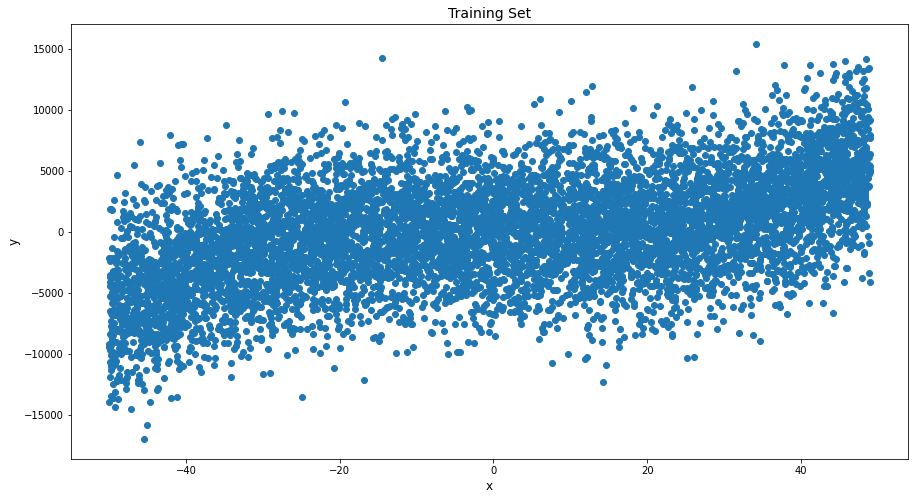

In [3]:
# Plotting the Training set
plt.figure(figsize=(15,8))
plt.scatter(train['X'], train['Y'])
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Training Set', fontsize=14)
plt.show()

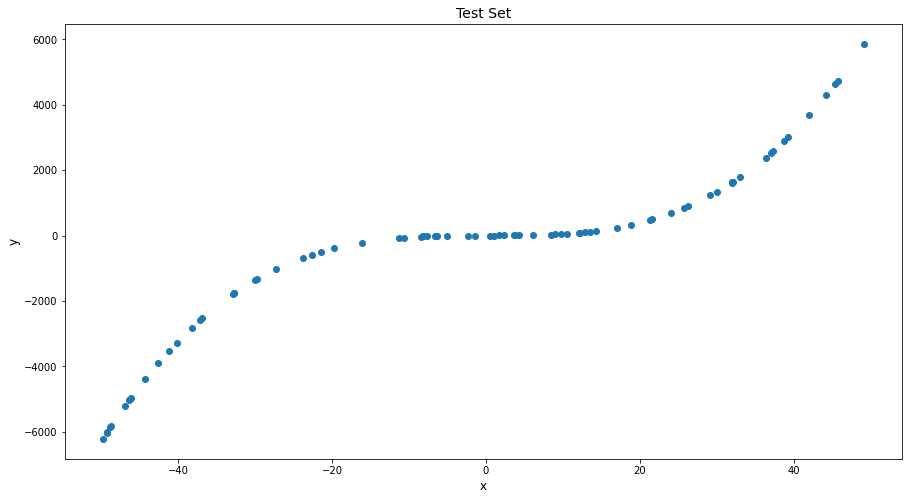

In [4]:
# Plotting the test set
plt.figure(figsize=(15,8))
plt.scatter(test['X'], test['Y'])
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Test Set', fontsize=14)
plt.show()

In [5]:
# divide train dataset into 10 smaller subsets

from sklearn.model_selection import train_test_split
train_split = np.split(train,10)


### Task 2.2.2
The 10 datasets obtained in the previous task are used to train 10 different models. The models are trained for polynomials from degrees 1 to 20, which gives us 200 different models.

In [6]:
# training the models corresponding to each degree of polynimial fit and each trainining data subset

models = []
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# for every degree of polynomial fit
for i in range(1,21):
    
    poly = PolynomialFeatures(degree=i)
    current_degree_model = []

    # for every training data subset
    for j in range(10):
        ex = train_split[j]
        ex_x = np.array(ex['X']).reshape(-1,1)
        ex_y = np.array(ex['Y']).reshape(-1,1)
        transformed_ex_x = poly.fit_transform(ex_x)
        reg = LinearRegression(fit_intercept=False).fit(transformed_ex_x,ex_y)
        current_degree_model.append(reg)    
    models.append(current_degree_model)

# Note: models[i][j] represents a model trained with polynomial fit of i and using training data subset j

For each polynomial, there are 10 different models. These are used to calculate the bias, variance and mean squared error for each polynomial. The same steps are repeated for all the 20 degrees. 

In [7]:
# Calculating the Bias, Variance and Total Error using the models and test dataset

ex_x = np.array(test['X']).reshape(-1,1)
ex_y = np.array(test['Y']).reshape(-1,1)

squared_bias = []
bias = []
variance = []
mse = []
results = []

# for every degree of polynomial fit
for i in range(1,21):
    cum_f_cap = np.zeros(test['Y'].shape).reshape(-1,1)
    cum_var = np.zeros(test['Y'].shape).reshape(-1,1)
    cum_err = np.zeros(test['Y'].shape).reshape(-1,1)

    poly = PolynomialFeatures(degree=i)
    transformed_ex_x = poly.fit_transform(ex_x)
    f_cap = []

    # for every training data subset
    for j in range(10):
        f_cap.append(models[i-1][j].predict(transformed_ex_x))

        cum_f_cap = cum_f_cap + f_cap[j]
        cum_var = cum_var + f_cap[j]**2
        cum_err = cum_err + (ex_y - f_cap[j])**2
    
    # convert cumulative values to expected values
    pred = cum_f_cap/10
    var = cum_var/10 - (pred)**2
    cum_err = cum_err/10

    squared_bias.append((np.mean((pred-ex_y)**2)))
    bias.append(np.mean(abs(pred-ex_y)))
    variance.append(np.mean(var))
    mse.append(np.mean(cum_err)) 
    results.append(pred)


The bias and variance are tabulated below.

In [8]:
# Tabulating the Bias-Variance-MSE
table_bias_variance_mse = {
    'Degree': [i for i in range(1, 21)],
    'Bias': bias,
    'Variance': variance,
    'MSE' : mse
}

print(tabulate(table_bias_variance_mse, headers='keys', tablefmt='psql'))

+----------+----------+------------+------------------+
|   Degree |     Bias |   Variance |              MSE |
|----------+----------+------------+------------------|
|        1 | 819.831  |    25924.8 |      1.02792e+06 |
|        2 | 810.646  |    50949.4 |      1.00554e+06 |
|        3 |  65.6582 |    56915   |  65509.5         |
|        4 |  71.8952 |    80598.6 |  88197.5         |
|        5 |  70.8861 |    82548   |  89518           |
|        6 |  67.939  |    92104.3 |  98799.7         |
|        7 |  72.0981 |   127828   | 135322           |
|        8 |  76.3823 |   144376   | 152127           |
|        9 |  76.7756 |   153684   | 161440           |
|       10 |  67.2033 |   157860   | 166923           |
|       11 |  65.8644 |   157999   | 166354           |
|       12 |  87.2841 |   169251   | 192409           |
|       13 |  74.7523 |   162914   | 175812           |
|       14 | 116.182  |   167441   | 208827           |
|       15 | 153.748  |   177053   | 248114     

### Observations
* The bias has very high values at the lower degrees (at $degrees < 3$), and drops steeply at $degree = 3$. After that, it almost remains the same, barring minor fluctuations till $degree = 11$. Then, it increases again as the model overfits to the training data at higher degrees and thus, does not map to the test data properly.
* The variance increases almost monotonically as the $ degree$ increases, taking the minimum value at $degree = 1$ and the maximum value at $ degree = 20$

### Task 3 : Calculating Irreducible Error

The Irreducible Error is the amount of noise inherently present in the data. We calculate the irreducible errors by using the mean MSE, mean Bias and mean Variance over all the 10 training models for each degree.

In [9]:
# Calculating Irreducible Error
irreducible_error = np.array(mse) - (np.array(squared_bias) + np.array(variance))

The graph and table of the irreducible error are given below. The irreducible error is very small, of the order 
$10^{-10}$. These small values denote that there is no significant noise in the data set. <b>The values are in the same range for all models which is as expected because the noise in the dataset remains same across different models as it is an inherent characteristic of the dataset rather than a property of the models</b>. Some values are negative, which along with the extremely small values, indicates that atleast a part of this error is due to the rounding errors in Python rather than actual noise in the dataset.

In [10]:
# tabulating for the irreducible error
table_irreducible_error = {
    'Degree': [i for i in range(1, 21)],
    'Irreducible Error' : irreducible_error
}

print(tabulate(table_irreducible_error, headers='keys', tablefmt='psql'))


+----------+---------------------+
|   Degree |   Irreducible Error |
|----------+---------------------|
|        1 |        -2.32831e-10 |
|        2 |         1.16415e-10 |
|        3 |         7.13044e-10 |
|        4 |         2.32831e-10 |
|        5 |        -5.09317e-10 |
|        6 |        -8.73115e-11 |
|        7 |         4.94765e-10 |
|        8 |        -6.1118e-10  |
|        9 |        -4.07454e-10 |
|       10 |         5.52973e-10 |
|       11 |        -2.91038e-10 |
|       12 |         2.03727e-10 |
|       13 |        -3.7835e-10  |
|       14 |        -5.82077e-11 |
|       15 |         1.16415e-10 |
|       16 |         0           |
|       17 |        -2.91038e-10 |
|       18 |         0           |
|       19 |         2.32831e-10 |
|       20 |         3.49246e-10 |
+----------+---------------------+


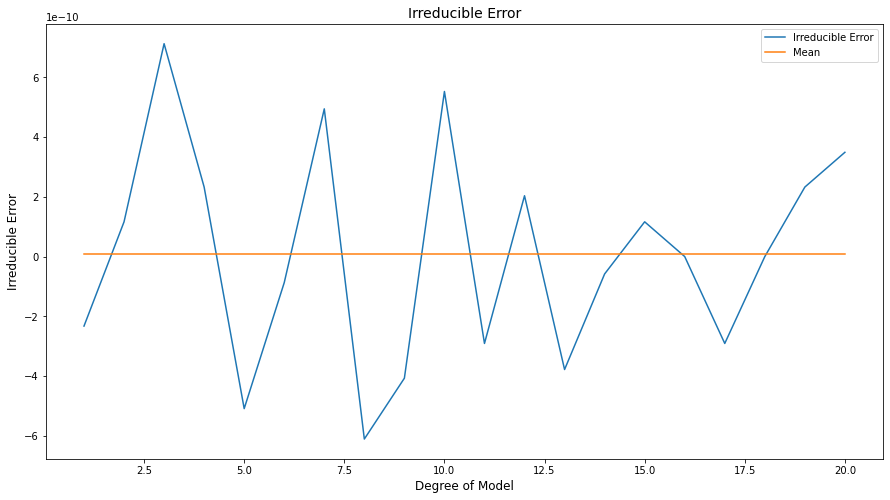

In [11]:
# graph for irreducible error
plt.figure(figsize=(15,8))
plt.plot(range(1,21), irreducible_error)
plt.plot(range(1,21), np.ones(irreducible_error.shape)*np.mean(irreducible_error))
plt.xlabel('Degree of Model', fontsize=12)
plt.ylabel('Irreducible Error', fontsize=12)
plt.title('Irreducible Error', fontsize=14)
plt.legend(['Irreducible Error', 'Mean'])

### Task 4 : Plotting Bias − Variance graph

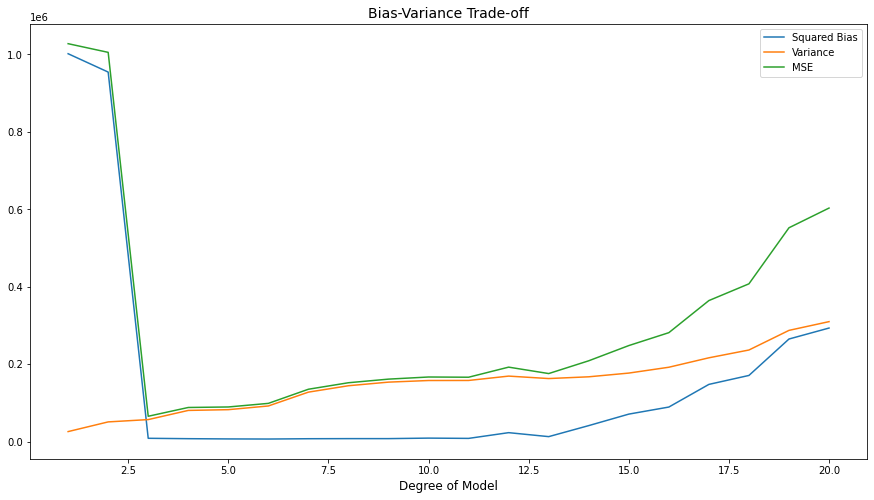

In [12]:
# depicting the bias-variance tradeoff
plt.figure(figsize=(15,8))
plt.plot(range(1,21), squared_bias)
plt.plot(range(1,21), variance)
plt.plot(range(1,21), mse)
plt.xlabel('Degree of Model', fontsize=12)
plt.title('Bias-Variance Trade-off', fontsize=14)
plt.legend(['Squared Bias', 'Variance', 'MSE'])

### Conclusion 
* The bias is very high for $degree <= 2$ which implies that the models at lower degrees are highly <b>underfitting</b> the data.
* At $ degree = 3 $, the bias makes an abrupt drop to a much lesser value and remains almost constant for the higher degrees.
* The variance monotonically increases till $ degree = 8 $ and then remains almost constant while reaching its maximum at the extremely higher degrees which signifies <b>overfitting</b>
* The MSE evaluates the model. The MSE initially begins at a high value and drops abruptly(controlled by <i>bias</i>) for $ degree < 3 $ and then increases almost monotonically(controlled by <i>variance</i>) for $ degree > 3 $. For $ degree =3 $ the MSE is minimum, signifying the bias and variance have an optimal balance in this model. So, this model is the most perfect model for the dataset.

* Since, $ degree = 3 $ yields the perfect model, the nature of the dataset is analysed to be cubic and of the form $y = ax^3 + bx^2 + cx + d $ where $ (a,b,c) $ are the set of co-efficients and $ d $ is the bias term for the linear model.

The above conclusions are also supported by the plots of test data and model performance given below.

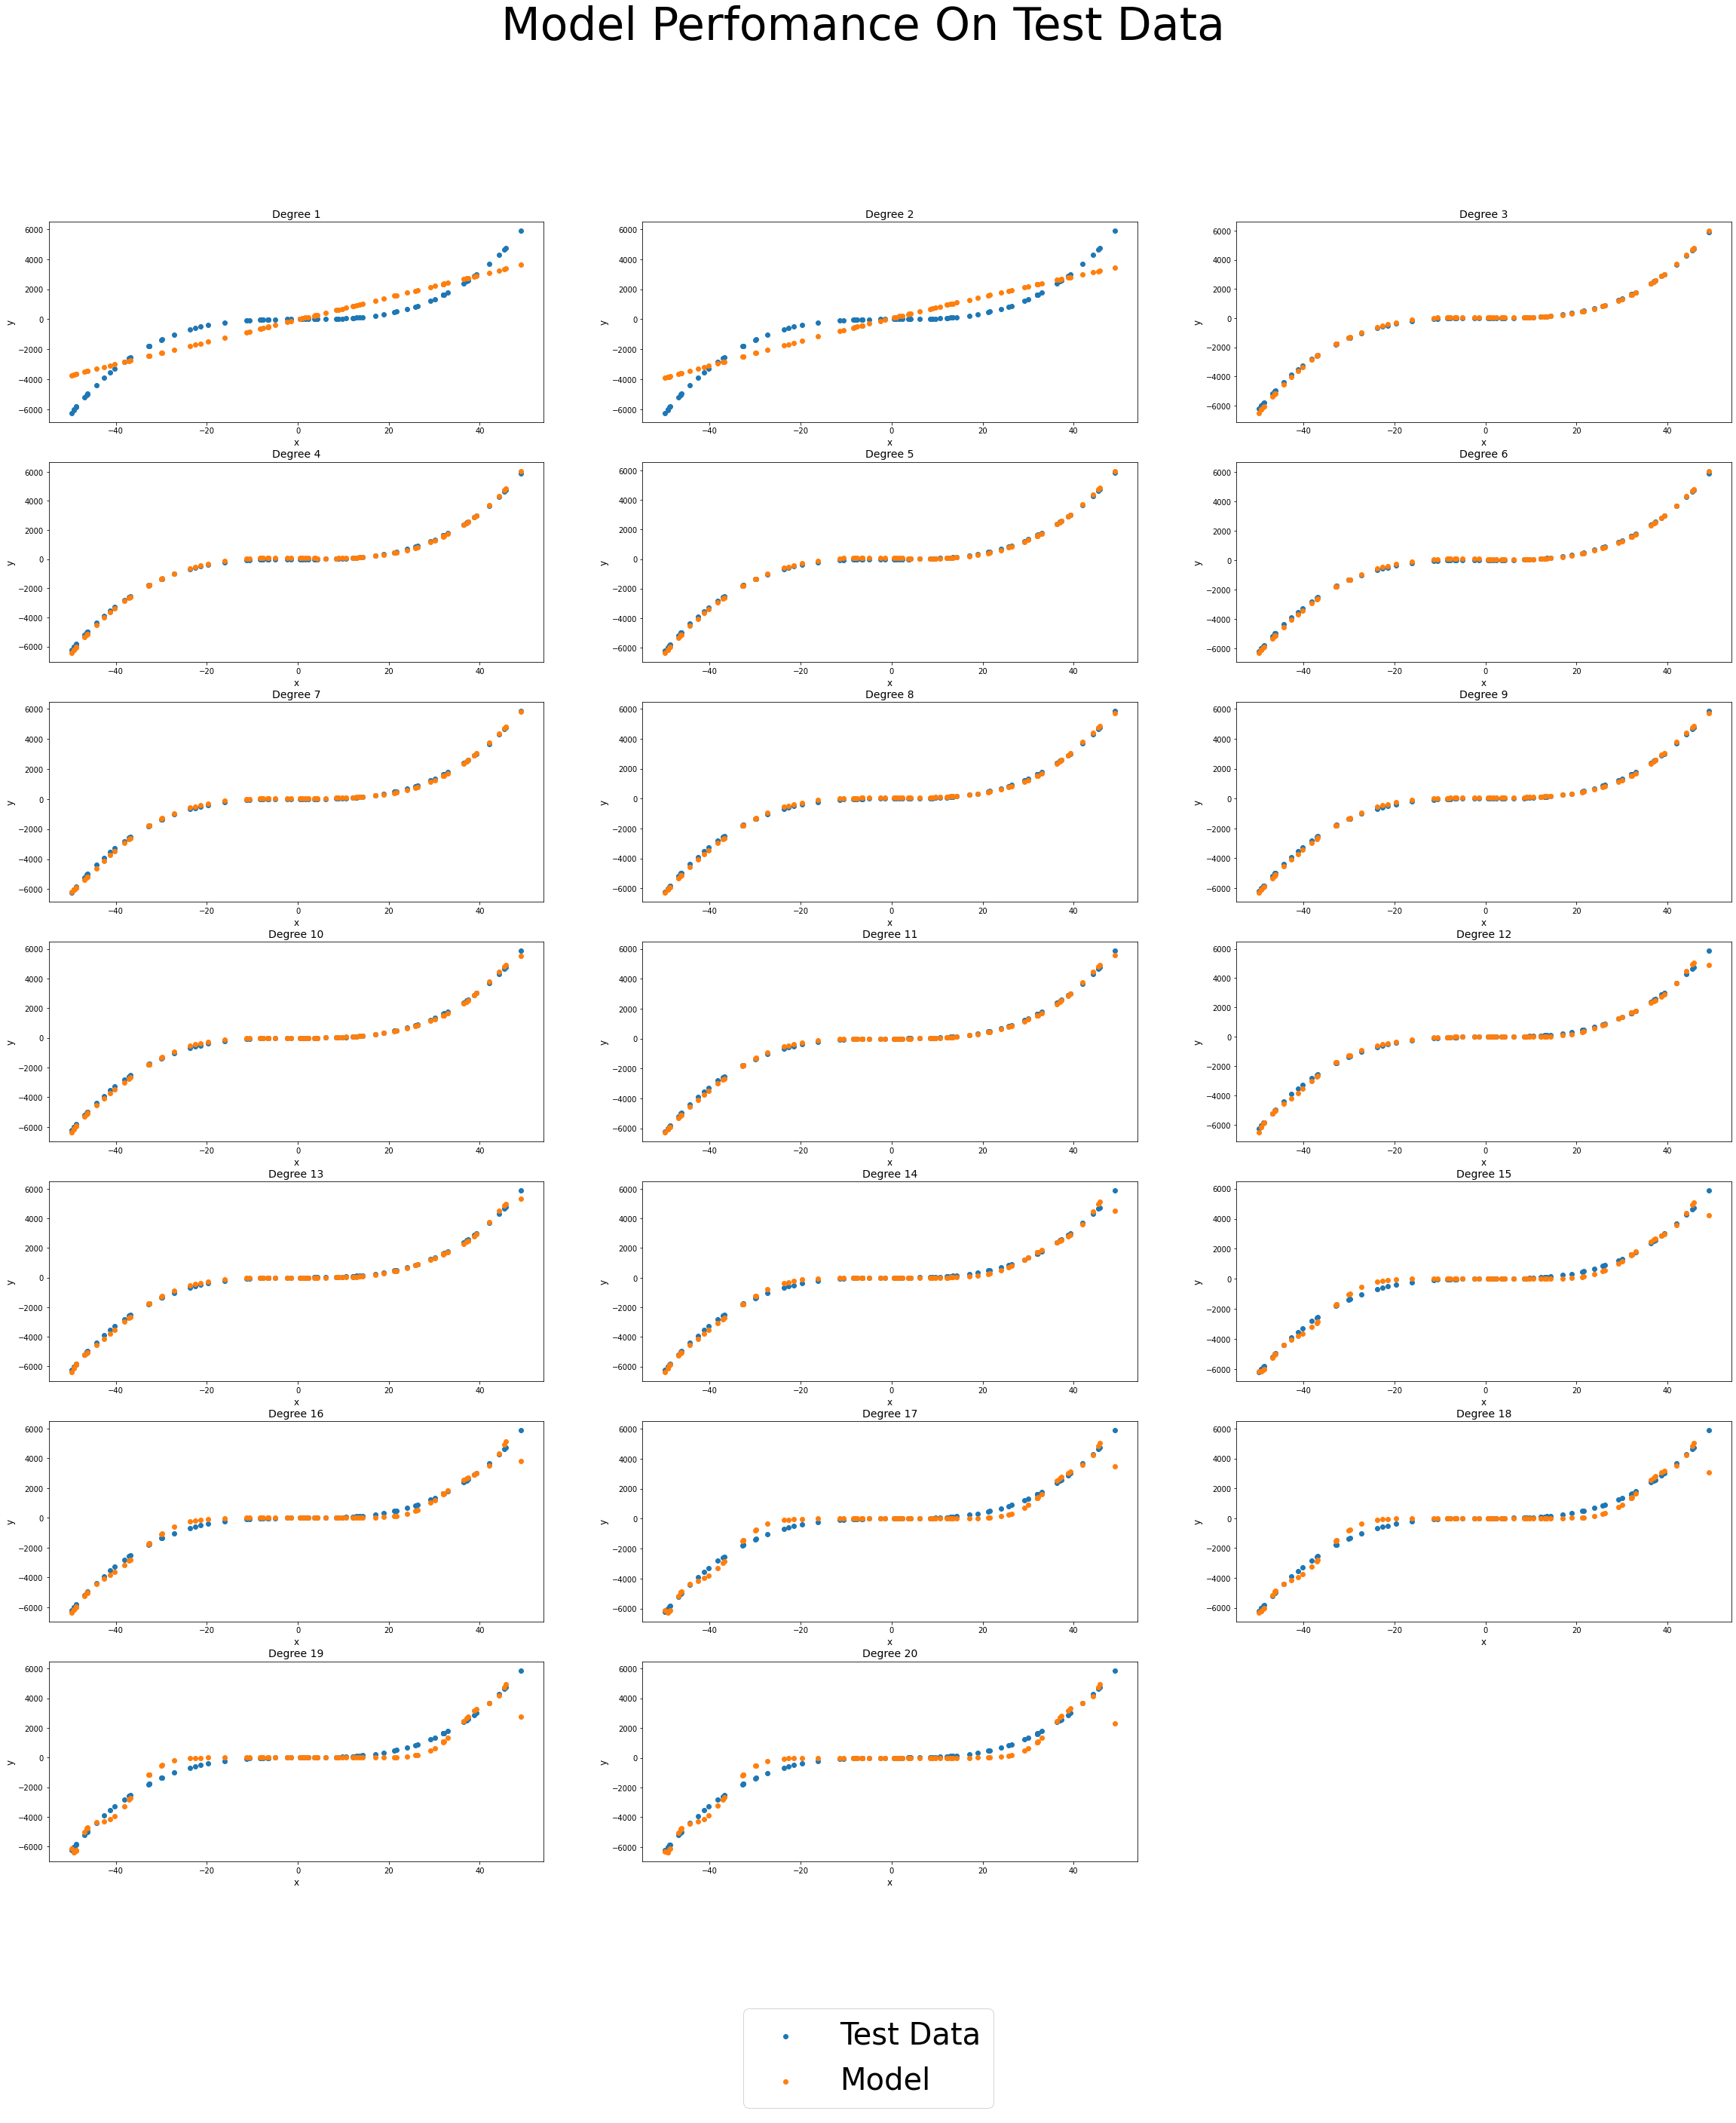

In [13]:
plt.figure(figsize=(40,40))

for i in range(1,21):
    plt.subplot(7,3,i)
    plt.scatter(test['X'], test['Y'])
    plt.scatter(test['X'], results[i-1])
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    title = 'Degree ' + str(i)
    plt.title(title, fontsize=14)
plt.suptitle("Model Perfomance On Test Data", fontsize=60)
plt.figlegend(['Test Data', 'Model'], loc='lower center', fontsize=40)
plt.savefig('test_model.png')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27334f06-0fd4-491f-b57d-6bed9cb616a3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>